# 50_Startups

# Preparing a prediction model for profit of 50_startups data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot

In [2]:
data=pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/multilinear regression/50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [7]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

# ONE HOT ENCODING

In [8]:
data1=pd.get_dummies(data)

In [9]:
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
data2=data1.rename({'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_spend','State_New York':'State_New_York'},axis=1)

In [11]:
data2.head()

,RD_Spend,Administration,Marketing_spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [12]:
data2.shape

(50, 7)

In [13]:
corr=data1.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<AxesSubplot:>

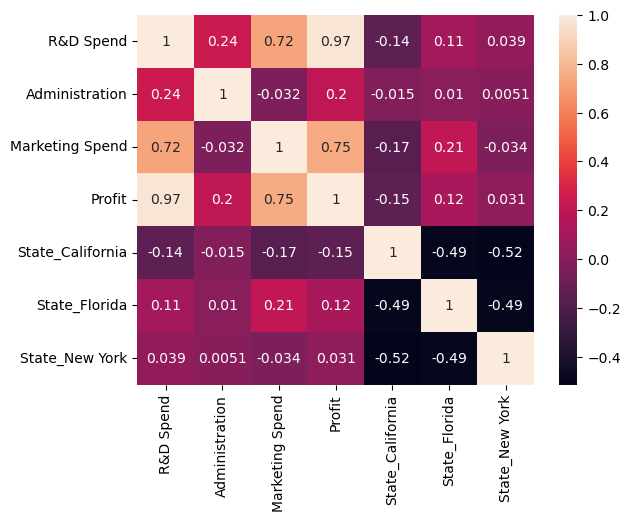

In [14]:
sns.heatmap(corr,annot=True)

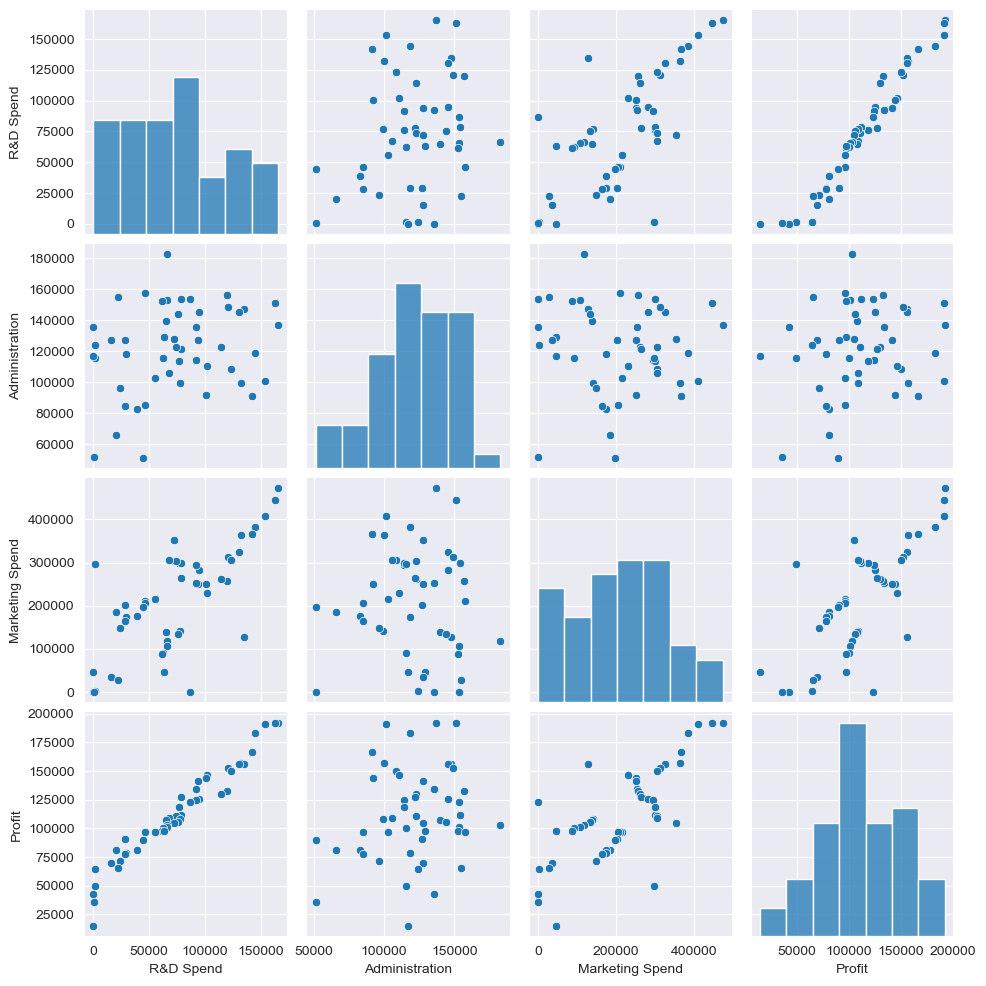

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(data)
plt.show()

# model buliding

In [16]:
import statsmodels.formula.api as smf

In [17]:
model=smf.ols('Profit~RD_Spend+Administration+Marketing_spend+State_California+State_Florida+State_New_York',data=data2).fit()

In [18]:
model.params

Intercept           37633.233317
RD_Spend                0.806023
Administration         -0.027004
Marketing_spend         0.026980
State_California    12492.110514
State_Florida       12690.899307
State_New_York      12450.223495
dtype: float64

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           1.34e-27
Time:                        13:04:47   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_New_York    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.31e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [21]:
data2[data2.duplicated()]

,RD_Spend,Administration,Marketing_spend,Profit,State_California,State_Florida,State_New_York


In [22]:
#creating VIF
rsq_RD_spend=smf.ols('RD_Spend~Administration+Marketing_spend+State_California+State_Florida+State_New_York',data=data2).fit().rsquared
VIF_RD_spend=1/(1-rsq_RD_spend)

rsq_Administration=smf.ols('Administration~RD_Spend+Marketing_spend+State_California+State_Florida+State_New_York',data=data2).fit().rsquared
VIF_Administration=1/(1-rsq_Administration)

rsq_Marketing_spend=smf.ols('Marketing_spend~RD_Spend+Administration+State_California+State_Florida+State_New_York',data=data2).fit().rsquared
VIF_Marketing_spend=1/(1-rsq_Marketing_spend)

rsq_State_California=smf.ols('State_California~RD_Spend+Administration+Marketing_spend+State_Florida+State_New_York',data=data2).fit().rsquared
VIF_State_California=1/(1-rsq_State_California)

rsq_State_Florida=smf.ols('State_Florida~RD_Spend+Administration+Marketing_spend+State_California+State_New_York',data=data2).fit().rsquared
VIF_State_Florida=1/(1-rsq_State_Florida)

rsq_State_New_York=smf.ols('State_New_York~RD_Spend+Administration+Marketing_spend+State_Florida+State_California',data=data2).fit().rsquared
VIF_State_New_York=1/(1-rsq_State_New_York)


C:\Users\Hp\AppData\Local\Temp\ipykernel_5180\661997882.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  VIF_State_California=1/(1-rsq_State_California)
C:\Users\Hp\AppData\Local\Temp\ipykernel_5180\661997882.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  VIF_State_Florida=1/(1-rsq_State_Florida)
C:\Users\Hp\AppData\Local\Temp\ipykernel_5180\661997882.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  VIF_State_New_York=1/(1-rsq_State_New_York)


In [23]:
# storing VIF values in a dataframe
D1={'variables':['RD_Spend','Administration','Marketing_spend','State_California','State_Florida','State_New_York'],'VIF':[VIF_RD_spend,VIF_Administration,VIF_Marketing_spend,VIF_State_California,VIF_State_Florida,VIF_State_New_York]}
VIF_FRAME=pd.DataFrame(D1)
VIF_FRAME

,variables,VIF
0,RD_Spend,2.495511
1,Administration,1.177766
2,Marketing_spend,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_New_York,inf


# simple linear Regression 

In [24]:
slr_1=smf.ols('Profit~RD_Spend',data=data2).fit()

In [25]:
print(slr_1.tvalues,'\n',slr_1.pvalues)

Intercept    19.320288
RD_Spend     29.151139
dtype: float64 
 Intercept    2.782697e-24
RD_Spend     3.500322e-32
dtype: float64


In [26]:
slr_2=smf.ols('Profit~Marketing_spend',data=data2).fit()

In [27]:
print(slr_2.tvalues,'\n',slr_2.pvalues)

Intercept          7.808356
Marketing_spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_spend    4.381073e-10
dtype: float64


# multiple Regression model

In [28]:
# considering both RD_Spend and Marketing_spend as one column
mlr=smf.ols('Profit~RD_Spend+Marketing_spend',data=data2).fit()
print(mlr.tvalues, '\n' , mlr.pvalues)

Intercept          17.463582
RD_Spend           19.265555
Marketing_spend     1.927052
dtype: float64 
 Intercept          3.504062e-22
RD_Spend           6.040433e-24
Marketing_spend    6.003040e-02
dtype: float64


In [29]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           2.16e-31
Time:                        13:04:48   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
import statsmodels.api as sm

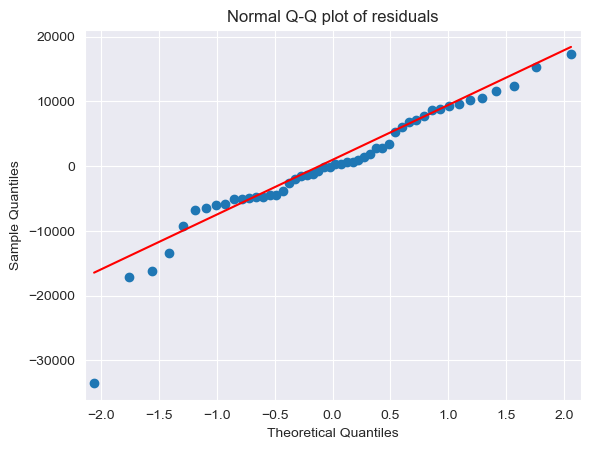

In [31]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [32]:
model2=smf.ols('Profit~+Administration+Marketing_spend+State_California+State_Florida+State_New_York',data=data2).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           1.34e-27
Time:                        13:04:50   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_New_York    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.31e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
# removing marketing_spend
model3=smf.ols('Profit~RD_Spend+Administration+State_California+State_Florida+State_New_York',data=data2).fit()

In [35]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           2.90e-28
Time:                        13:04:50   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.122e+04   4607.941      8.945      0.000    3.19e+04    5.05e+04
RD_Spend             0.8609      0.031     27.665      0.000       0.798       0.924
Administration      -0.0527      0.050     -1.045      0.301      -0.154       0.049
State_California  1.339e+04   2421.500      5.529      0.000    8511.111    1.83e+04
State_Florida     1.448e+04   2518.987      5.748      0.000    9405.870    1.96e+04
State_New_York    1.335e+04   2459.306      5.428      0.000    8395.623    1.83e+04
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     3.40e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.35e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

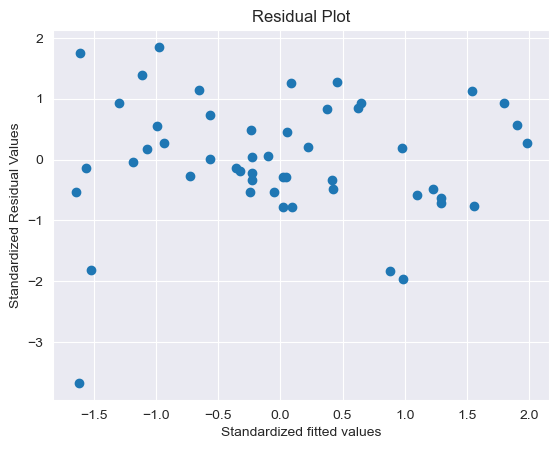

In [37]:
plt.scatter(get_standardized_values(model3.fittedvalues),
            get_standardized_values(model3.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [38]:
# removing administration
model4=smf.ols('Profit~RD_Spend+State_California+State_Florida+State_New_York',data=data2).fit()

In [39]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           2.76e-29
Time:                        13:04:50   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.686e+04   1959.786     18.806      0.000    3.29e+04    4.08e+04
RD_Spend             0.8530      0.030     28.226      0.000       0.792       0.914
State_California  1.189e+04   1956.677      6.079      0.000    7955.697    1.58e+04
State_Florida     1.306e+04   2122.665      6.152      0.000    8785.448    1.73e+04
State_New_York     1.19e+04   2036.022      5.847      0.000    7805.580     1.6e+04
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     1.92e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

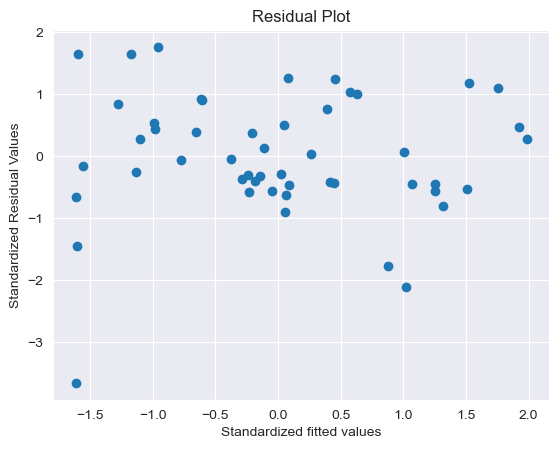

In [40]:
plt.scatter(get_standardized_values(model4.fittedvalues),
            get_standardized_values(model4.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized Residual Values')
plt.show()

eval_env: 1


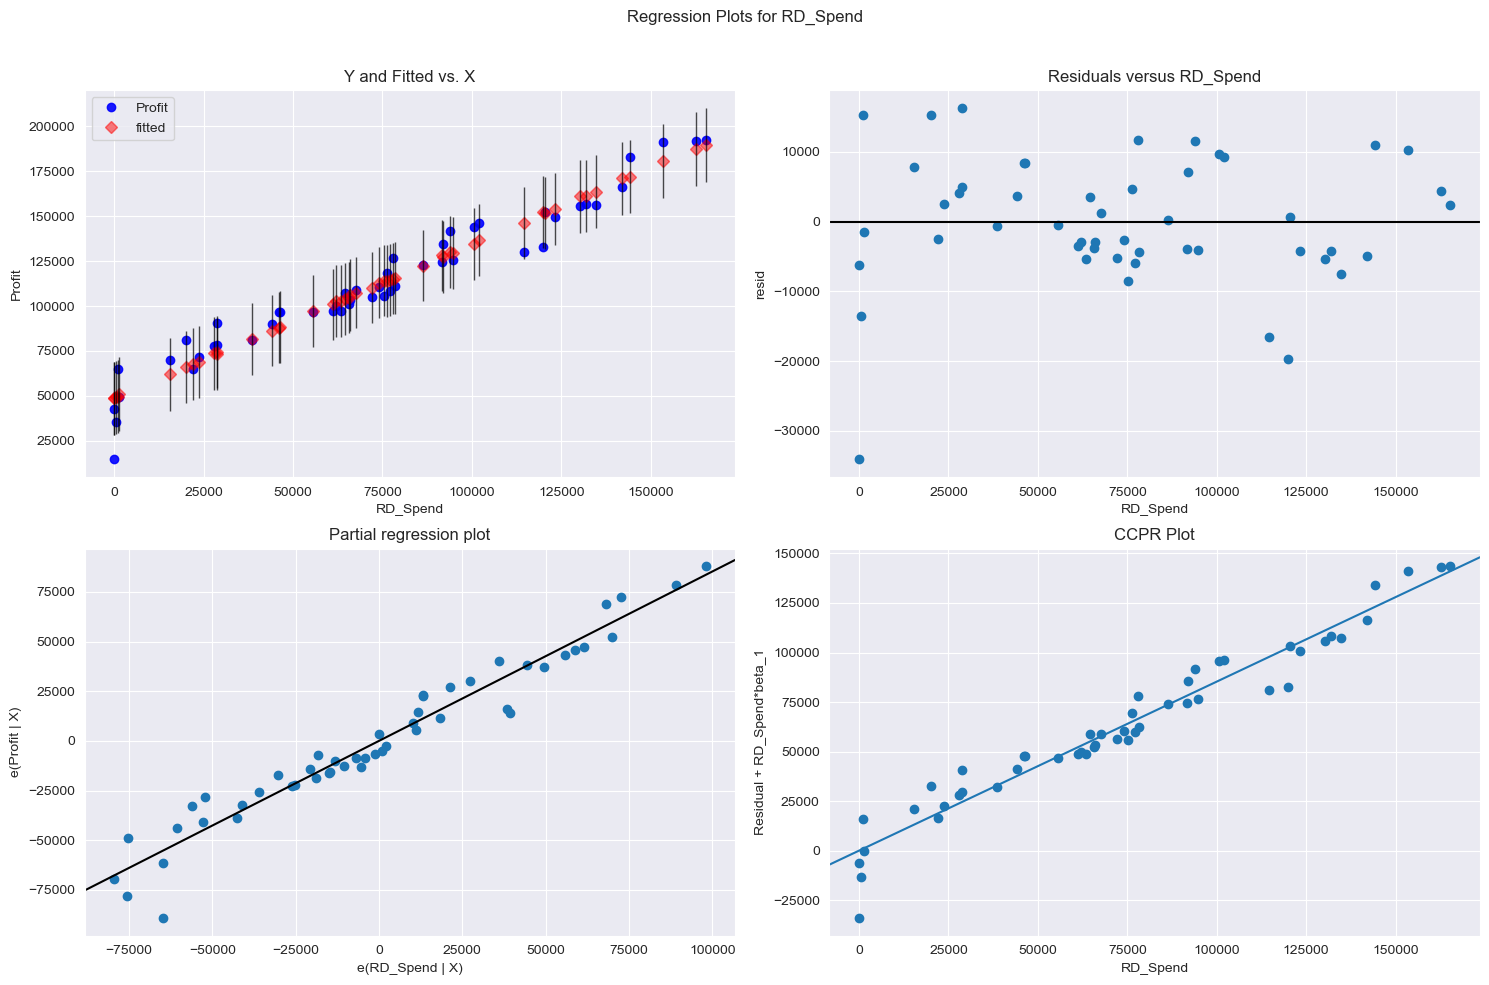

In [41]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model4,'RD_Spend',fig=fig)
plt.show()

In [42]:
from statsmodels.graphics.regressionplots import influence_plot

In [43]:
#cooks distance 
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [44]:
(c,_)

(array([6.58235386e-06, 3.39430615e-03, 2.39098625e-02, 2.02032949e-02,
        1.20198420e-02, 1.00370545e-02, 2.13697865e-03, 3.57036535e-03,
        6.25257579e-05, 5.41213370e-03, 1.89764313e-02, 1.65867572e-02,
        1.82797330e-02, 6.34364572e-03, 6.17285106e-02, 3.72134923e-02,
        1.35078103e-02, 3.71193311e-03, 2.94854637e-03, 2.81922632e-02,
        6.02783698e-04, 1.00287995e-02, 3.02178458e-03, 3.16115938e-04,
        4.34597714e-03, 3.56884817e-03, 4.96640589e-03, 2.78597505e-02,
        9.20897921e-04, 9.83021753e-05, 2.28936702e-05, 3.65145588e-06,
        5.61582965e-04, 2.31043413e-04, 1.79909587e-02, 7.13289876e-03,
        5.07832731e-02, 6.16526092e-05, 4.78300794e-02, 1.37854568e-03,
        1.94676476e-03, 1.88154422e-03, 1.42427115e-04, 2.00561912e-02,
        1.00026060e-04, 8.09098154e-02, 3.62771434e-02, 3.84131479e-03,
        1.34036686e-01, 2.26250945e-01]),
 array([1.        , 0.99999998, 0.99998365, 0.99999082, 0.99999847,
        0.99999918, 1.    

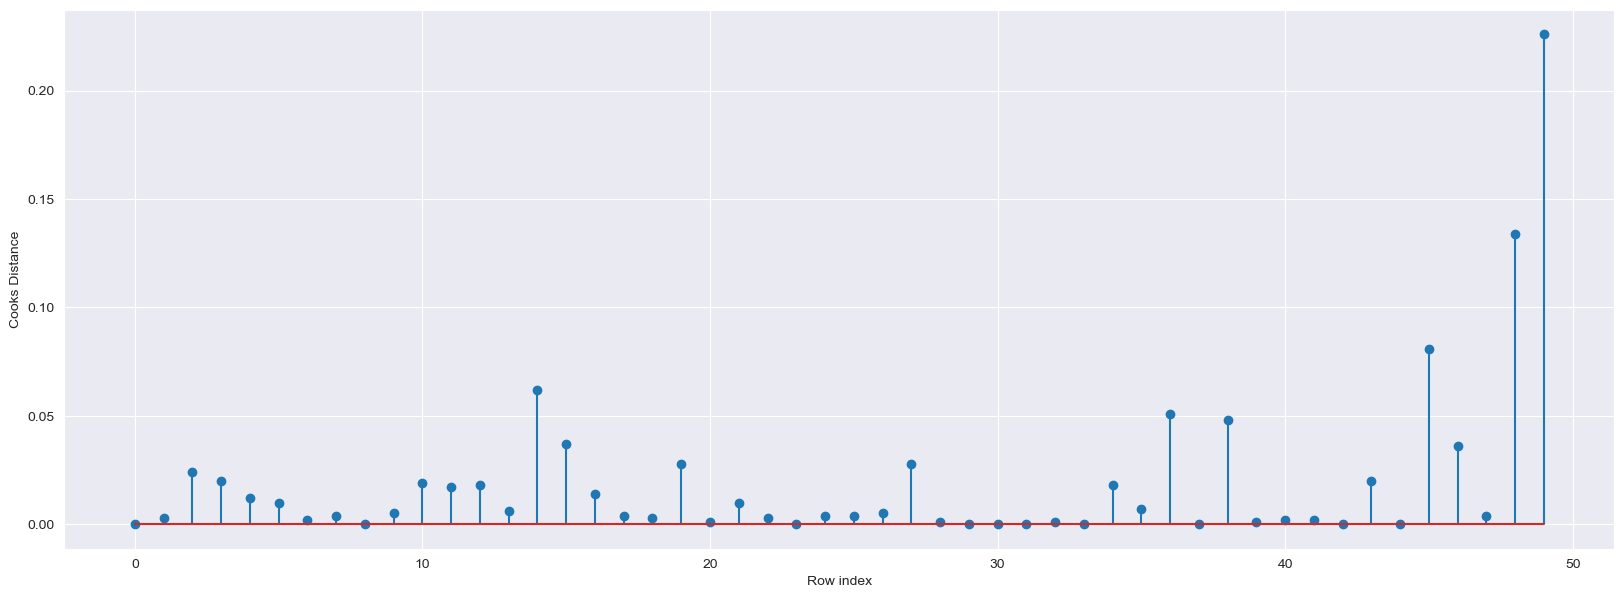

In [45]:
# plotting the influence values using stem plot

fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
(np.argmax(c),np.max(c))

(49, 0.2262509450150931)

In [47]:
#Discarding the data points which are influencers and reassign the row number (reset_index())
data3=data2.drop(data2.index[[49]],axis=0).reset_index()
data3.head()

,index,RD_Spend,Administration,Marketing_spend,Profit,State_California,State_Florida,State_New_York
0,0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [48]:
data3.shape

(49, 8)

In [49]:
model5=smf.ols('Profit~RD_Spend+State_California+State_Florida+State_New_York',data=data3).fit()

In [50]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     340.4
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           6.26e-31
Time:                        13:04:53   Log-Likelihood:                -508.42
No. Observations:                  49   AIC:                             1025.
Df Residuals:                      45   BIC:                             1032.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.876e+04   1707.520     22.698      0.000    3.53e+04    4.22e+04
RD_Spend             0.8288      0.026     31.792      0.000       0.776       0.881
State_California  1.379e+04   1704.699      8.089      0.000    1.04e+04    1.72e+04
State_Florida     1.312e+04   1790.310      7.326      0.000    9509.693    1.67e+04
State_New_York    1.185e+04   1717.230      6.902      0.000    8392.789    1.53e+04
==============================================================================
Omnibus:                        0.005   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.998   Jarque-Bera (JB):                0.150
Skew:                          -0.003   Prob(JB):                        0.928
Kurtosis:                       2.729   Cond. No.                     1.86e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
R_sqr=pd.DataFrame({'Model':['Model','Model2','Model3','Model4','Model5'],'R_Squared_Value':[model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared]})

In [52]:
R_sqr

,Model,R_Squared_Value
0,Model,0.950752
1,Model2,0.613108
2,Model3,0.947980
3,Model4,0.946717
4,Model5,0.957797


# creating model using sklearn

In [53]:
#SPLITTING DATA INTO INDEPENDENT AND DEPENDENT VARIABLE
x= data.iloc[:,:-1].values
y=data.iloc[:,4].values

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
labelencoder=LabelEncoder()
x[:,3]=labelencoder.fit_transform(x[:,3])
x1=pd.DataFrame(x)
x1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

In [58]:
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [59]:
y_train

array([155752.6 , 132602.65,  64926.08,  35673.41, 101004.64, 129917.04,
        99937.59,  97427.84, 126992.93,  71498.49, 118474.03,  69758.98,
       152211.77, 134307.35, 107404.34, 156991.12, 125370.37,  78239.91,
        14681.4 , 191792.06, 141585.52,  89949.14, 108552.04, 156122.51,
       108733.99,  90708.19, 111313.02, 122776.86, 149759.96,  81005.76,
        49490.75, 182901.99, 192261.83,  42559.73,  65200.33])

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model=LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [62]:
y_predict=model.predict(x_test)

In [63]:
y_predict

array([104055.1842384 , 132557.60289702, 133633.01284474,  72336.28081054,
       179658.27210893, 114689.63133397,  66514.82249033,  98461.69321326,
       114294.70487032, 169090.51127461,  96281.907934  ,  88108.30057881,
       110687.1172322 ,  90536.34203081, 127785.3793861 ])

In [64]:
test_model_score=model.score(x_test,y_test)
print("Model Score/Performance on Testing data",test_model_score)

Model Score/Performance on Testing data 0.9355139722149947


In [65]:
train_model_score=model.score(x_train,y_train)
print("Model Score/Performance on Testing data",train_model_score)

Model Score/Performance on Testing data 0.9515496105627431


In [66]:
y_predict_df=pd.DataFrame({'Actual value':y_predict,'predicted value':y_test})

In [67]:
y_predict_df

,Actual value,predicted value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


In [68]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_predict,y_test)
print("R2 score of model is:",r2Score)  # that is rsquare value of model is 93%

R2 score of model is: 0.9339448007716634


# QUESTION 2

# ToyotaCorolla

# preparing a prediction model for predicting Price.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
data=pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/multilinear regression/ToyotaCorolla.csv',encoding='unicode_escape')

In [71]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA

In [72]:
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [73]:
data1=data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [74]:
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [75]:
data1.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [76]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [77]:
data1[data1.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [78]:
data2=data1.drop_duplicates()
data2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [79]:
data2.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [80]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [81]:
data2.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


### outlier detection

In [82]:
import matplotlib.pyplot as plt

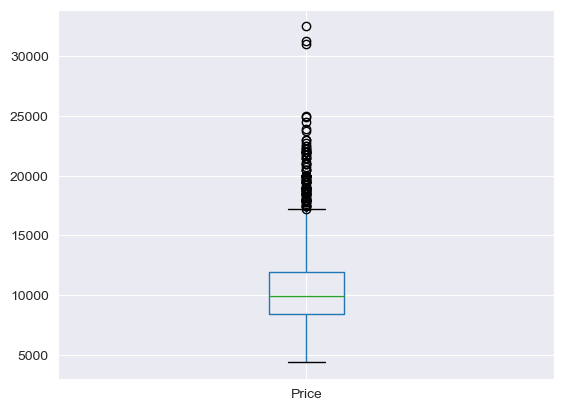

In [83]:
data2.boxplot(column='Price')
plt.show()

<AxesSubplot:>

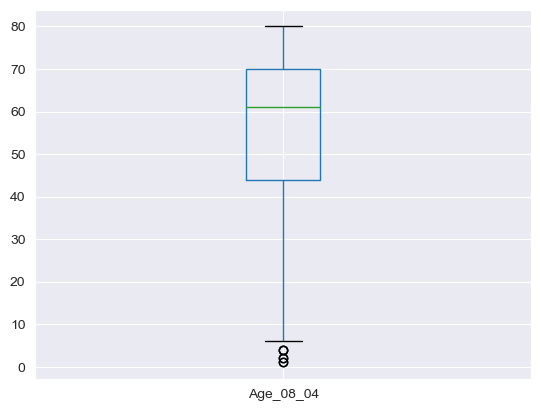

In [84]:
data2.boxplot(column='Age_08_04') # outliers are there

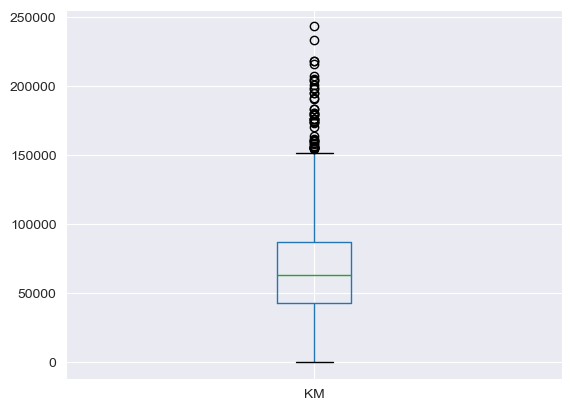

In [85]:
data2.boxplot(column='KM')
plt.show()

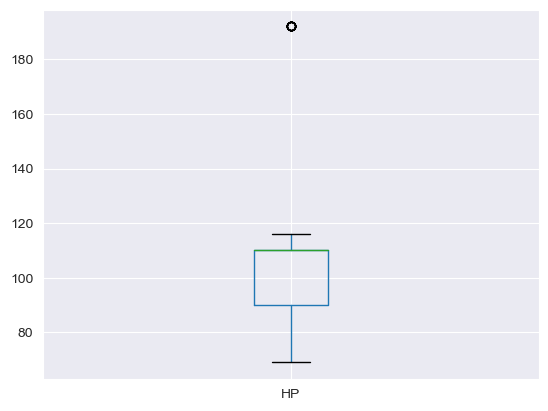

In [86]:
data2.boxplot(column='HP')
plt.show()

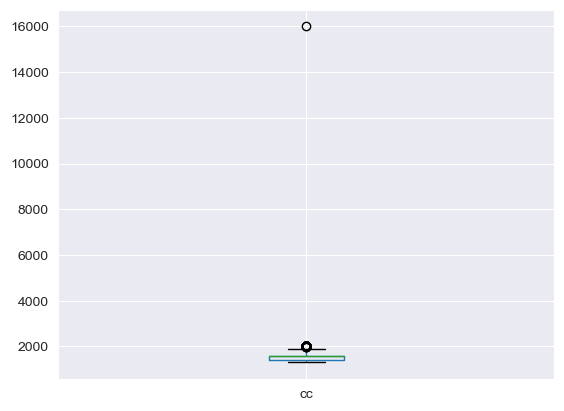

In [87]:
data2.boxplot(column='cc')
plt.show()

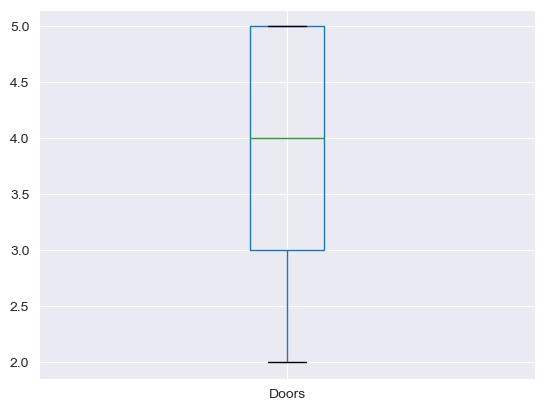

In [88]:
data2.boxplot(column='Doors')
plt.show()

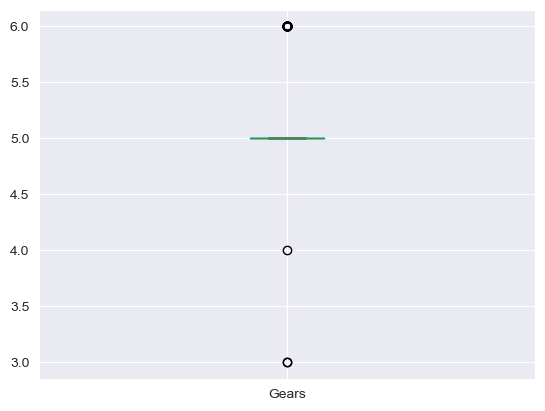

In [89]:
data2.boxplot(column='Gears')
plt.show()

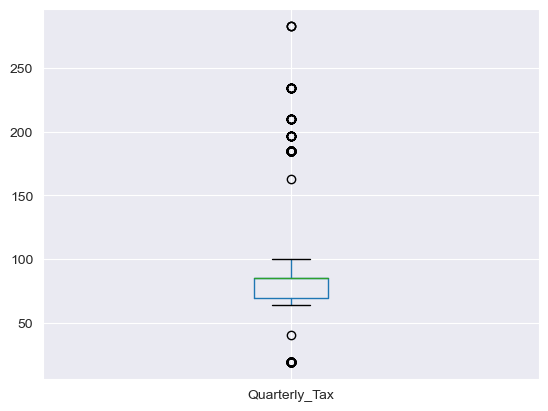

In [90]:
data2.boxplot(column='Quarterly_Tax')
plt.show()

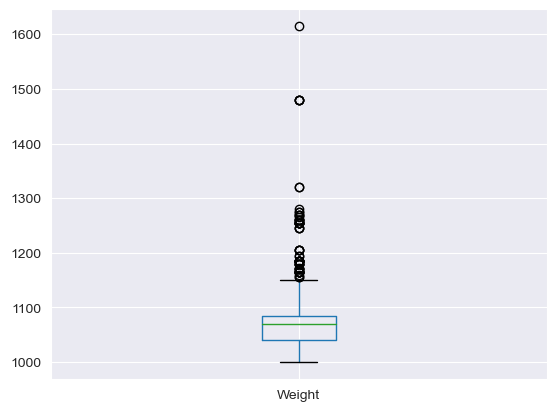

In [91]:
data2.boxplot(column='Weight')
plt.show()

## correlation

In [92]:
data2.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


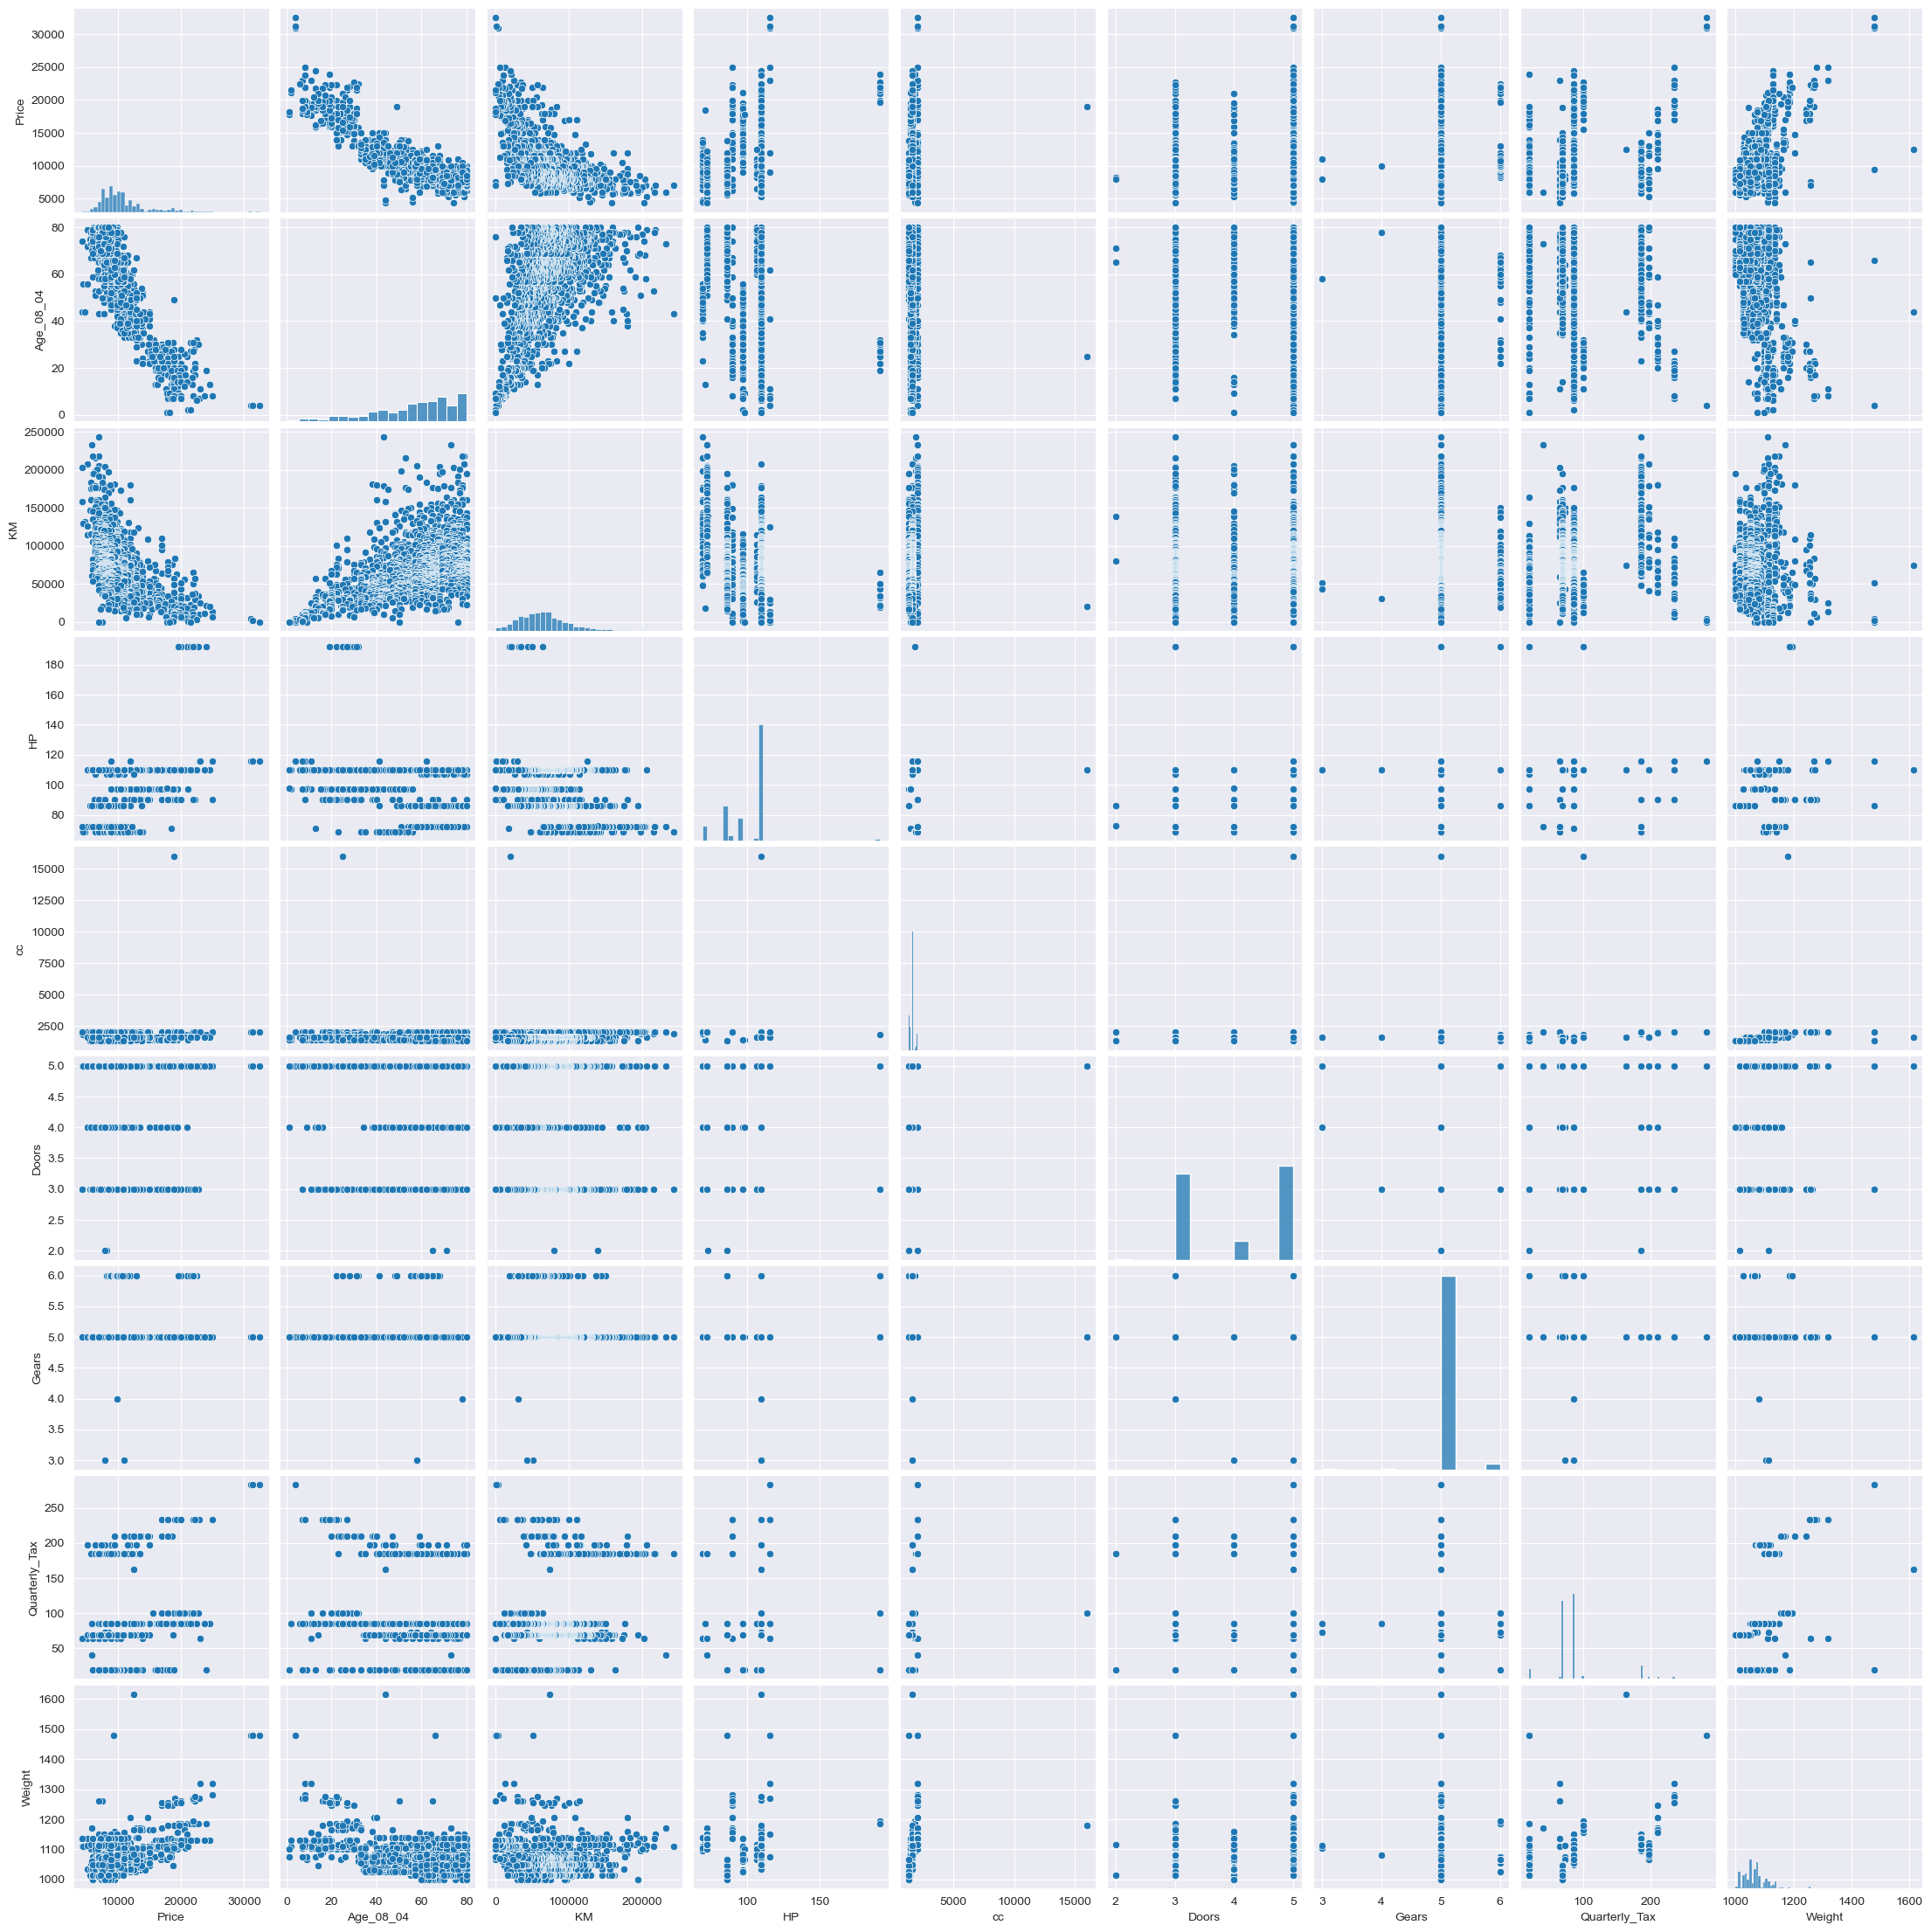

In [93]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(data2)
plt.show()

## model building

In [94]:
import statsmodels.formula.api as smf

In [95]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit()
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [96]:
# T-VALUES & P-VALUES
print(model.tvalues,'\n',model.pvalues)

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


In [97]:
# Finding R-squared and Adjusted R-Square value
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [98]:
import statsmodels.formula.api as smf

In [99]:
ml_Age_08_04=smf.ols('Price~Age_08_04',data=data2).fit()
print(ml_Age_08_04.tvalues, '\n' , ml_Age_08_04.pvalues)

Intercept    138.818198
Age_08_04    -68.846693
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


In [100]:
ml_KM=smf.ols('Price~KM',data=data2).fit()
print(ml_KM.tvalues, '\n' , ml_KM.pvalues)

Intercept    88.643156
KM          -26.221579
dtype: float64 
 Intercept     0.000000e+00
KM           4.117214e-124
dtype: float64


In [101]:
ml_HP=smf.ols('Price~HP',data=data2).fit()
print(ml_HP.tvalues, '\n' , ml_HP.pvalues)

Intercept     4.906904
HP           12.525607
dtype: float64 
 Intercept    1.031004e-06
HP           3.123394e-34
dtype: float64


In [102]:
ml_cc=smf.ols('Price~cc',data=data2).fit()
print(ml_cc.tvalues, '\n' , ml_cc.pvalues)

Intercept    24.879592
cc            4.745039
dtype: float64 
 Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


In [103]:
ml_Doors=smf.ols('Price~Doors',data=data2).fit()
print(ml_Doors.tvalues, '\n' , ml_Doors.pvalues)

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [104]:
ml_Gears=smf.ols('Price~Gears',data=data2).fit()
print(ml_Gears.tvalues, '\n' , ml_Gears.pvalues)

Intercept    1.805193
Gears        2.421261
dtype: float64 
 Intercept    0.071254
Gears        0.015590
dtype: float64


In [105]:
ml_Quarterly_Tax=smf.ols('Price~Quarterly_Tax',data=data2).fit()
print(ml_Quarterly_Tax.tvalues, '\n' , ml_Quarterly_Tax.pvalues)

Intercept        41.593196
Quarterly_Tax     8.191956
dtype: float64 
 Intercept        1.214615e-248
Quarterly_Tax     5.633141e-16
dtype: float64


In [106]:
ml_Weight=smf.ols('Price~Weight',data=data2).fit()
print(ml_Weight.tvalues, '\n' , ml_Weight.pvalues)

Intercept   -19.937904
Weight       26.664730
dtype: float64 
 Intercept     2.951487e-78
Weight       1.547077e-127
dtype: float64


## model validation techniques

In [107]:
#creatings VIF(VARIANCE INFLATION FACTOR)
rsq_age_08_04=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared
vif_age_08_04=1/(1-rsq_age_08_04)

rsq_KM=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~KM+Age_08_04+cc+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~HP+KM+Age_08_04+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Doors=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=data2).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_Quarterly_Tax=smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=data2).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax)

rsq_Weight=smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=data2).fit().rsquared
vif_Weight=1/(1-rsq_Weight)



In [108]:
#STORING THE VALUES IN A DATAFRAME
D1={'variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
vif_frame=pd.DataFrame(D1)
vif_frame

,variables,VIF
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


In [109]:
# all the variables has VIF<10, means there is no collinearity

In [110]:
import statsmodels.api as sm

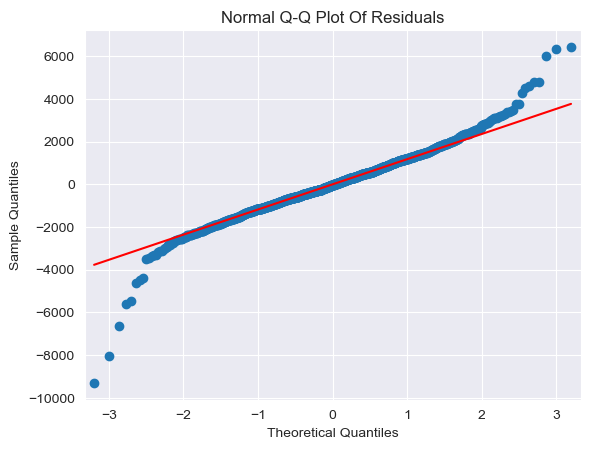

In [111]:
qq_plot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q Plot Of Residuals')
plt.show()

In [112]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [113]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [114]:
#residual plot for homoscedasticity
def get_standardized_values(vals):
    return (vals_vals.mean())/vals.std()

eval_env: 1


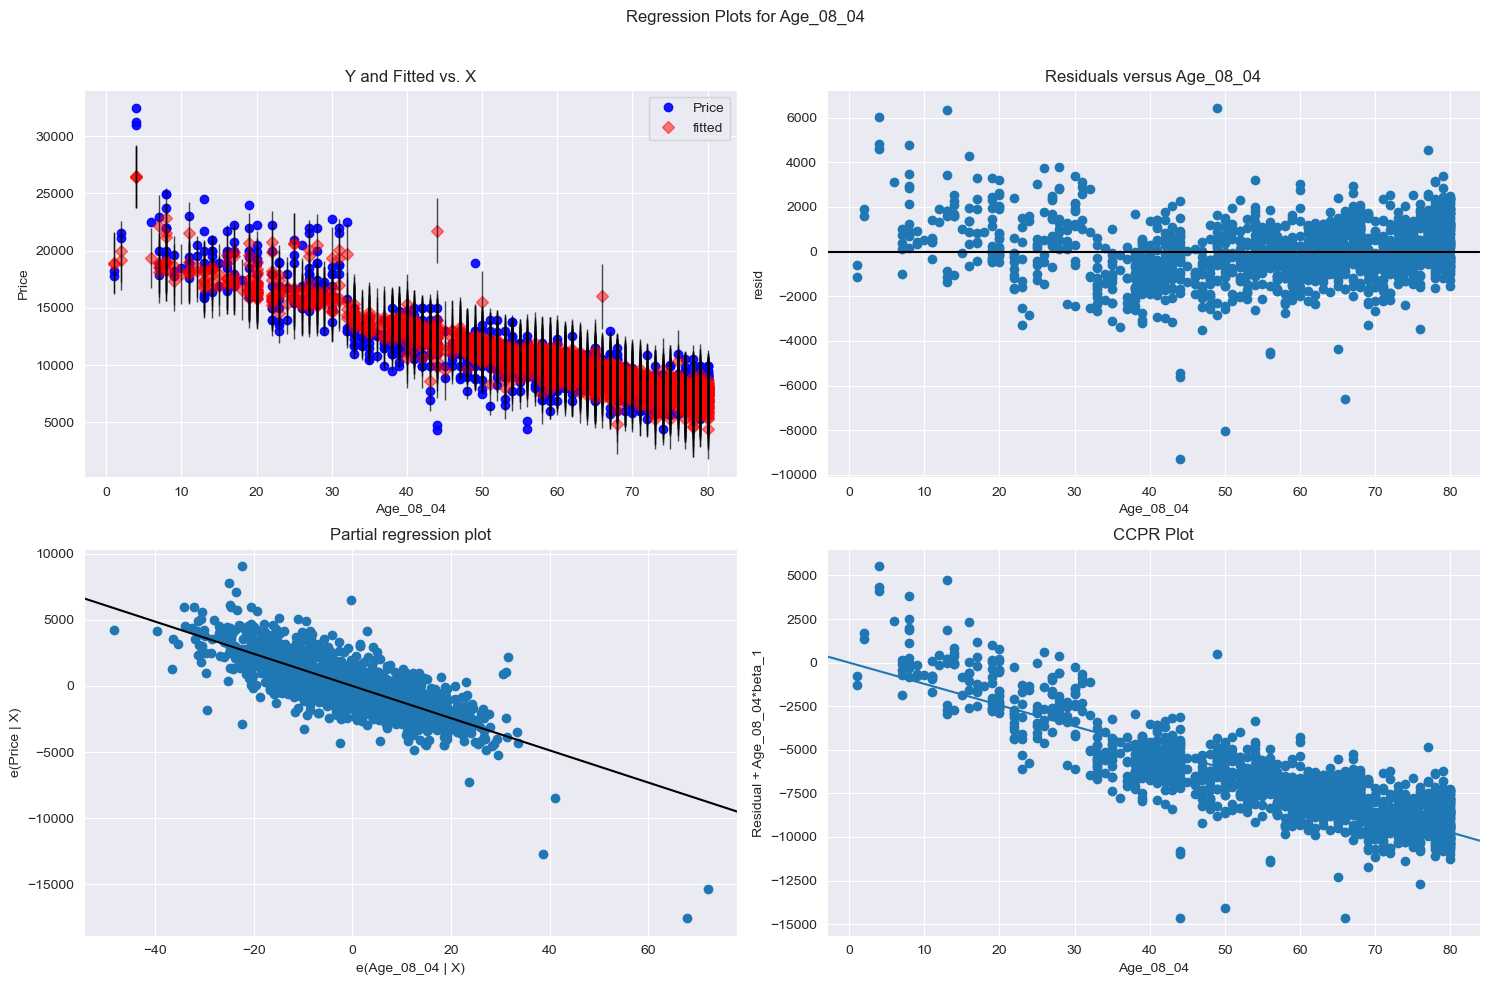

In [115]:
#Residual v/s regressor
import statsmodels.api as sm
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

eval_env: 1


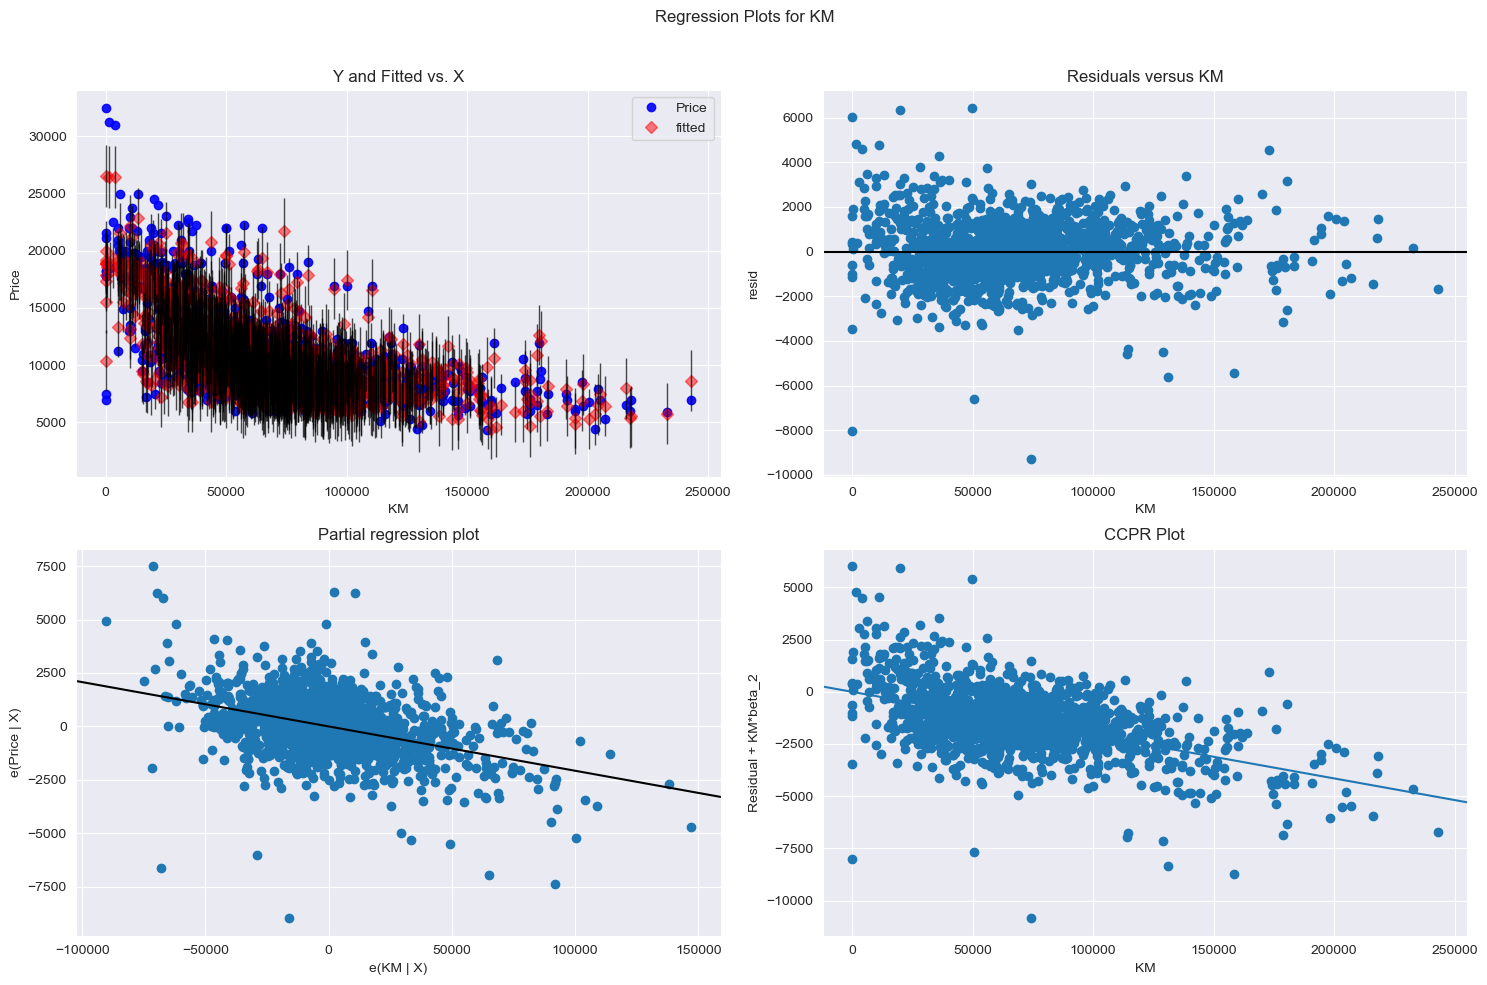

In [116]:
import statsmodels.api as sm
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


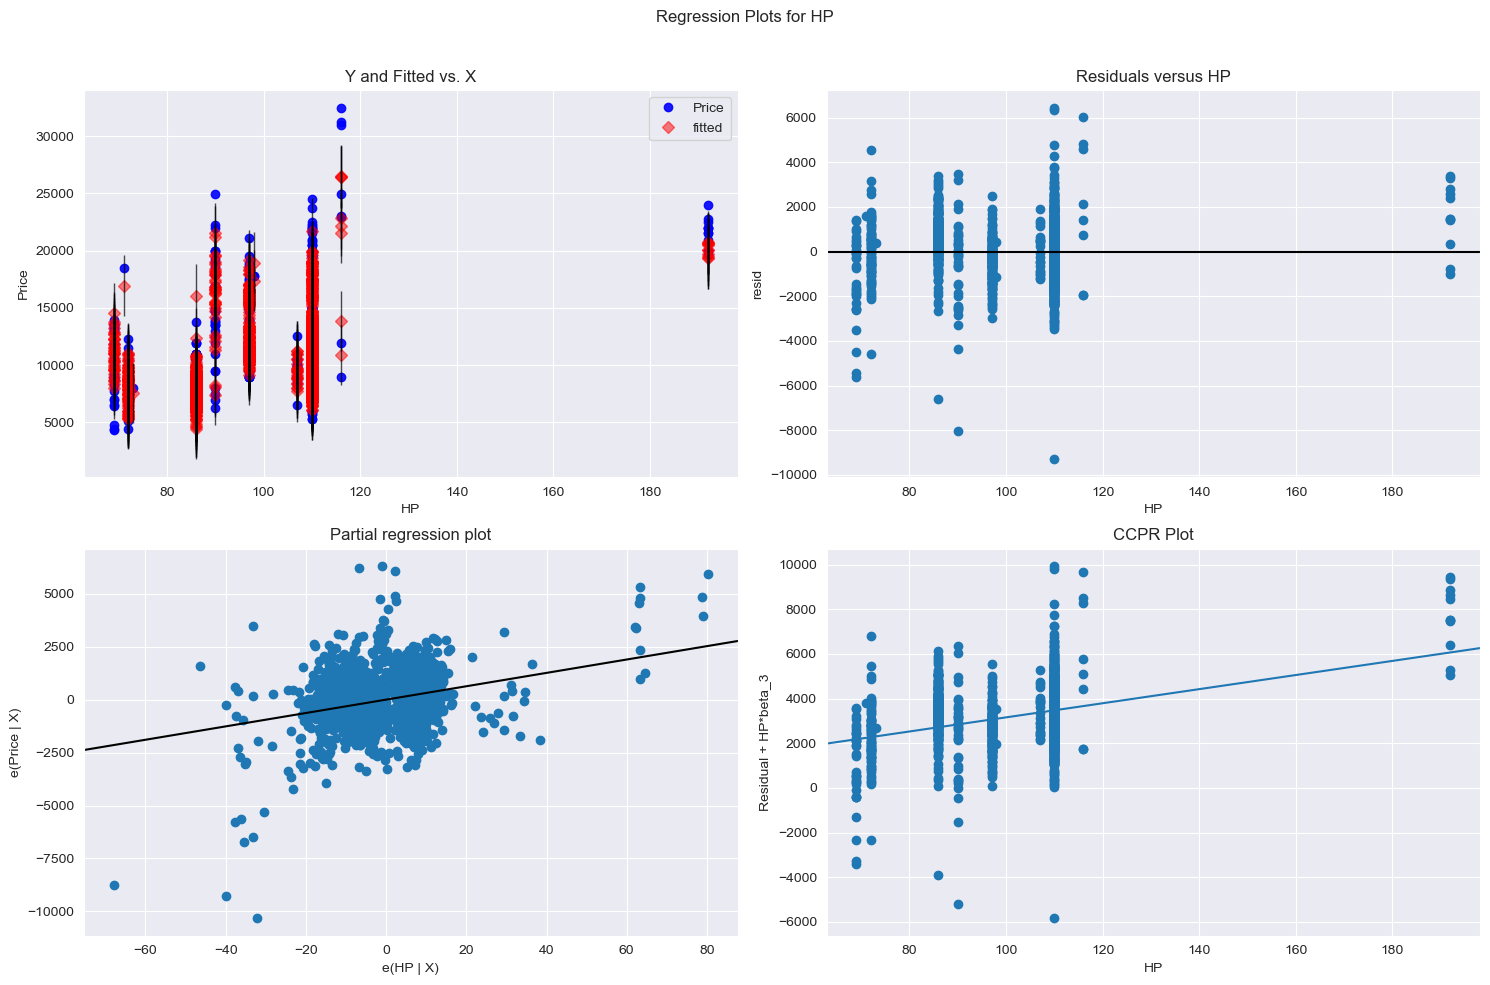

In [117]:
import statsmodels.api as sm
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


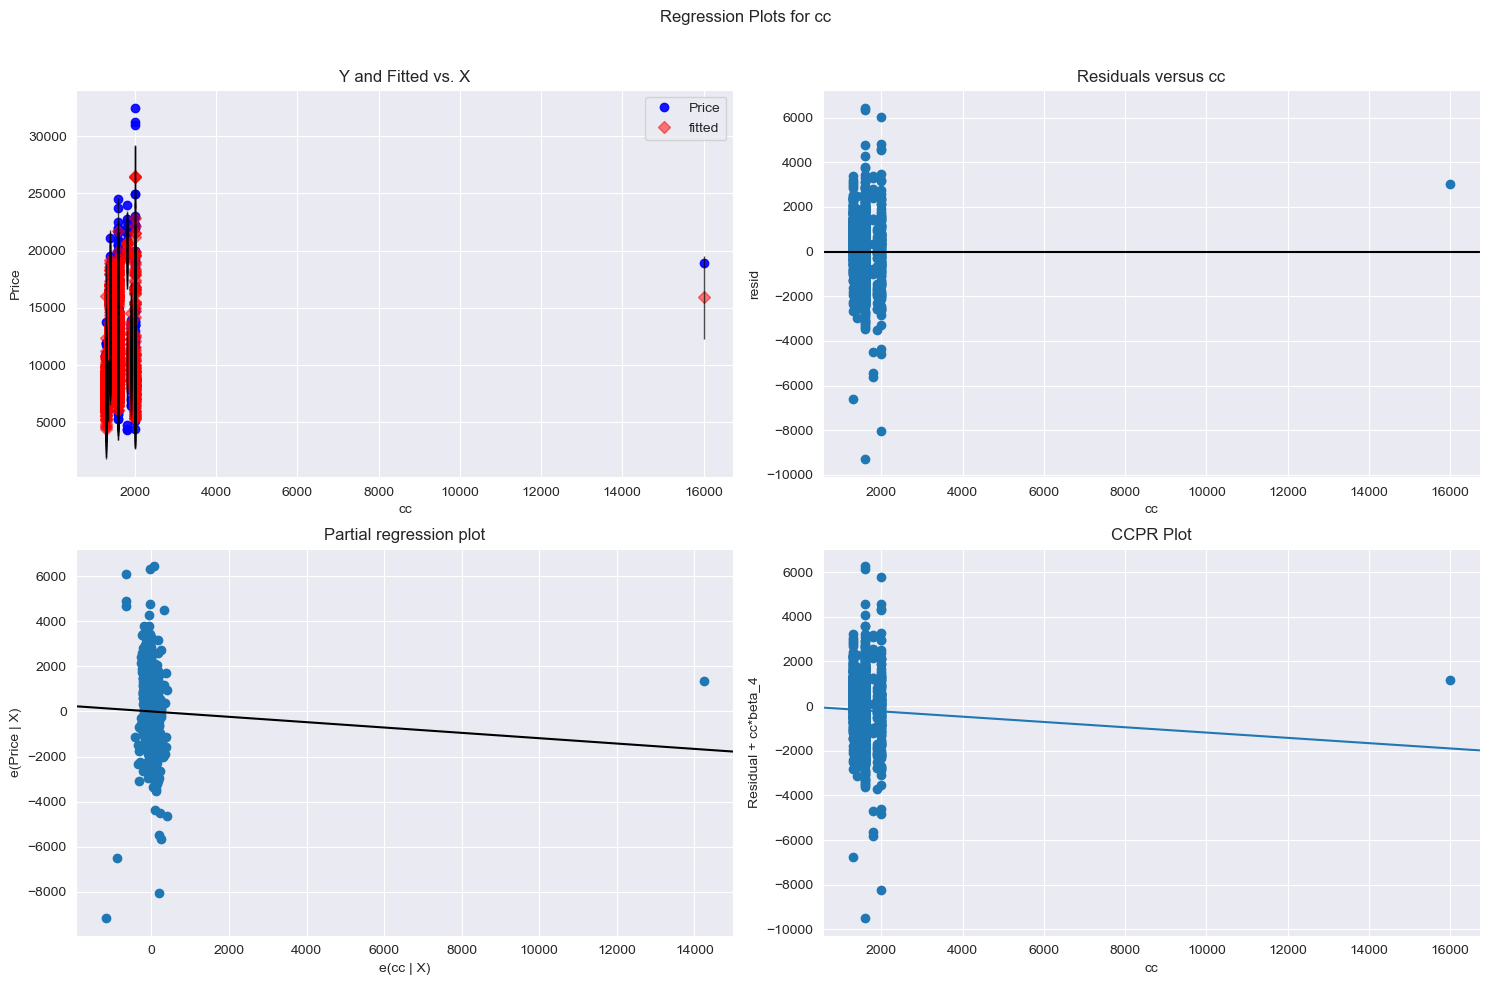

In [118]:
import statsmodels.api as sm
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


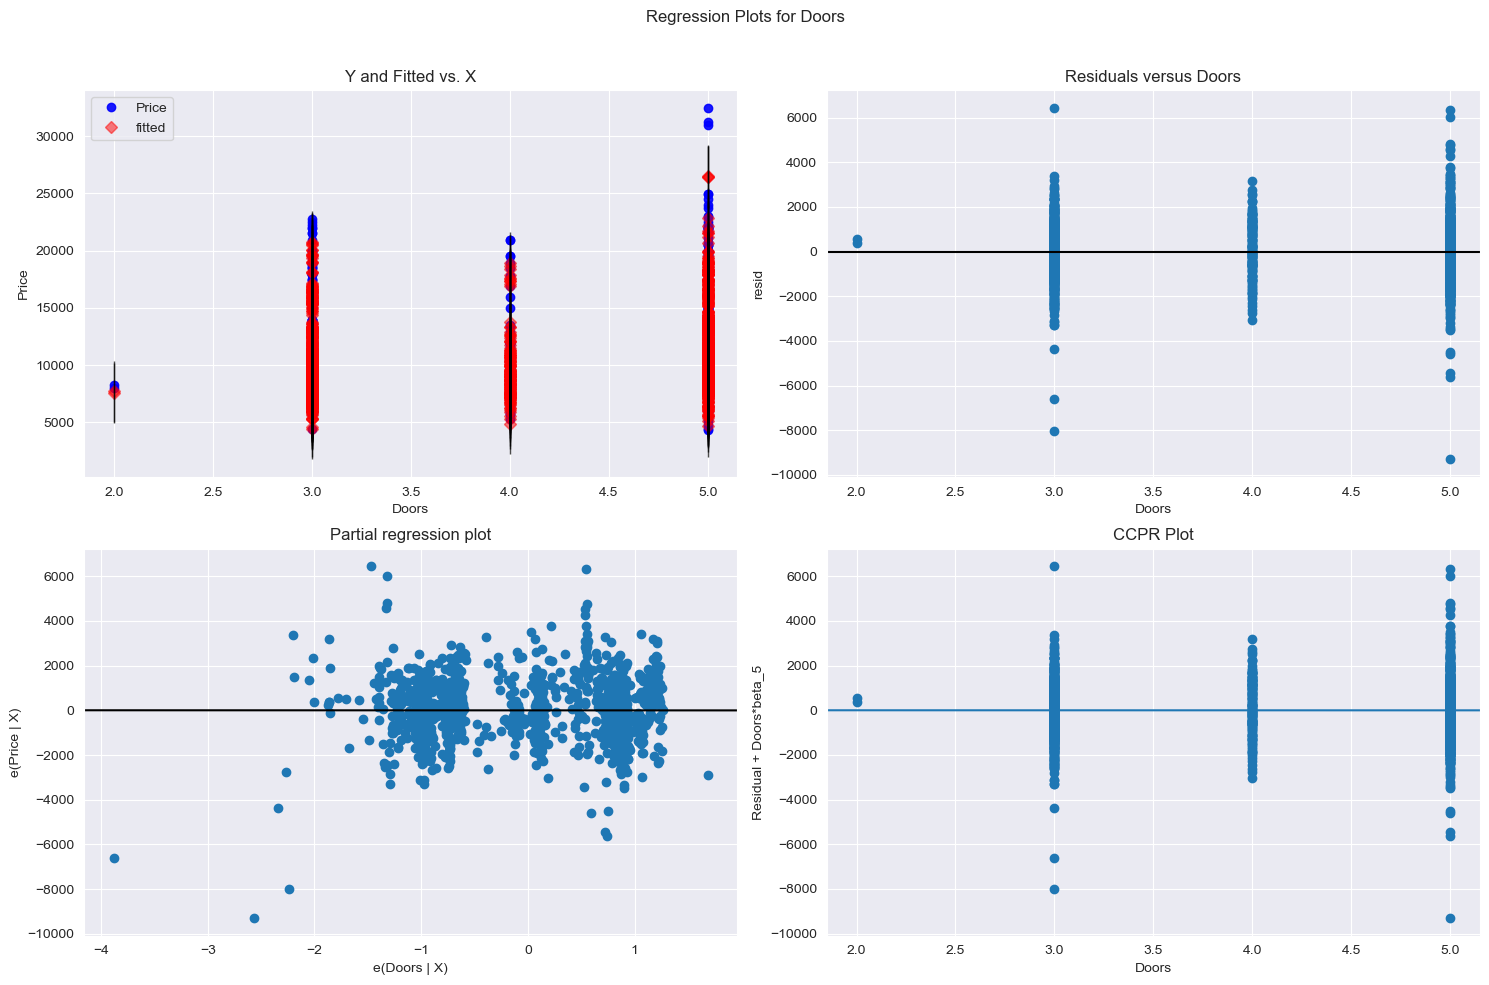

In [119]:
import statsmodels.api as sm
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


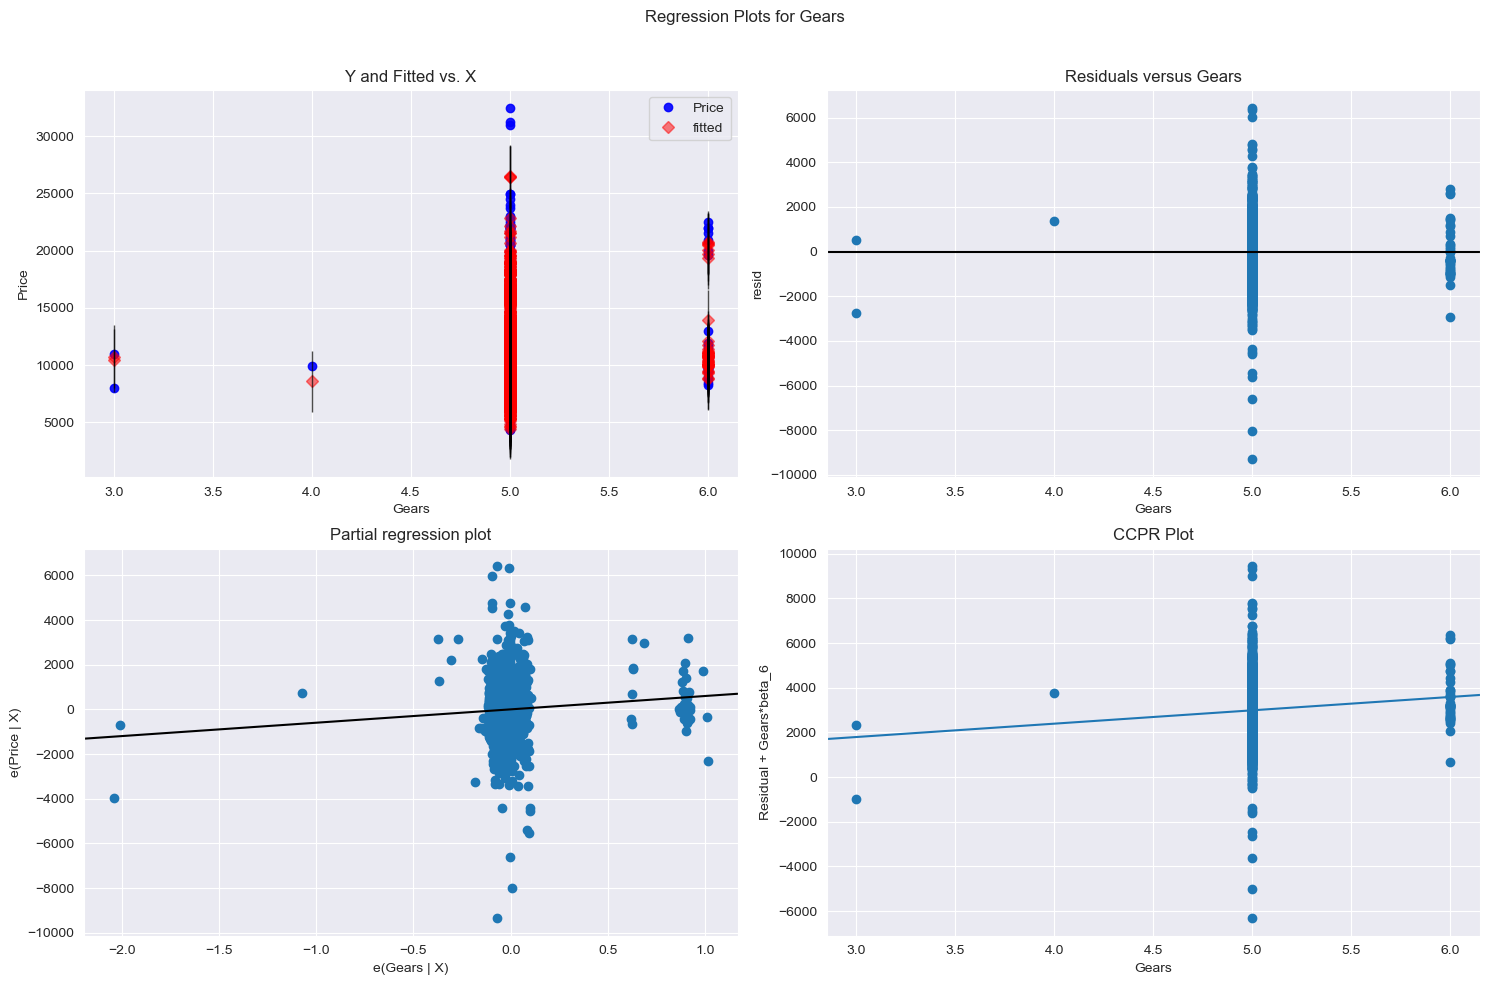

In [120]:
import statsmodels.api as sm
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


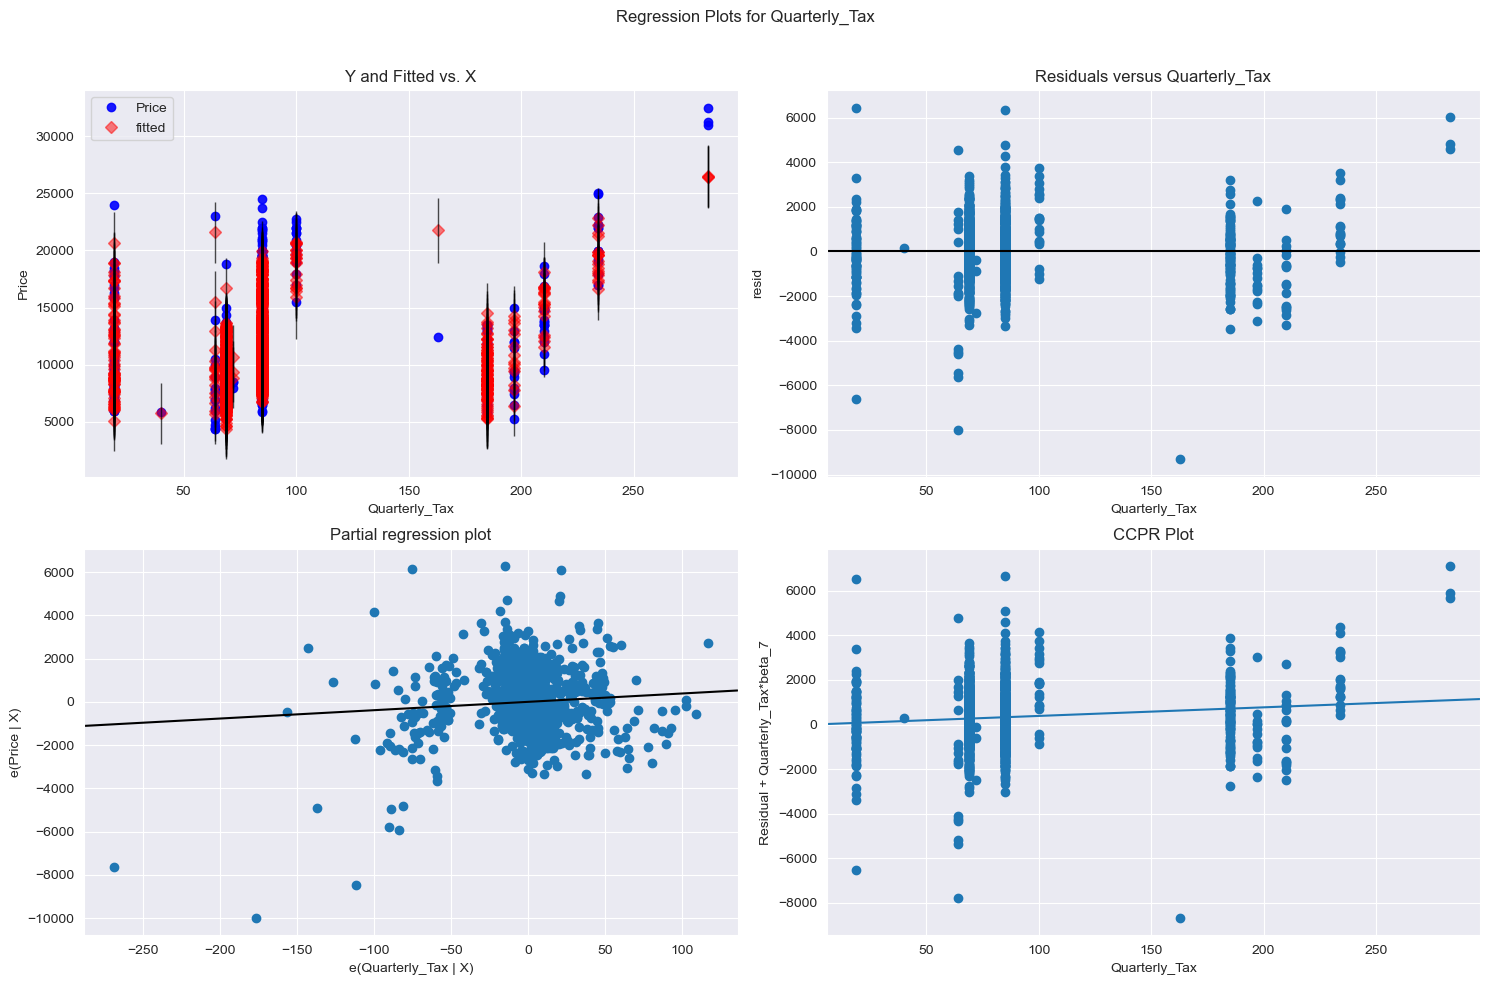

In [121]:
import statsmodels.api as sm
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

eval_env: 1


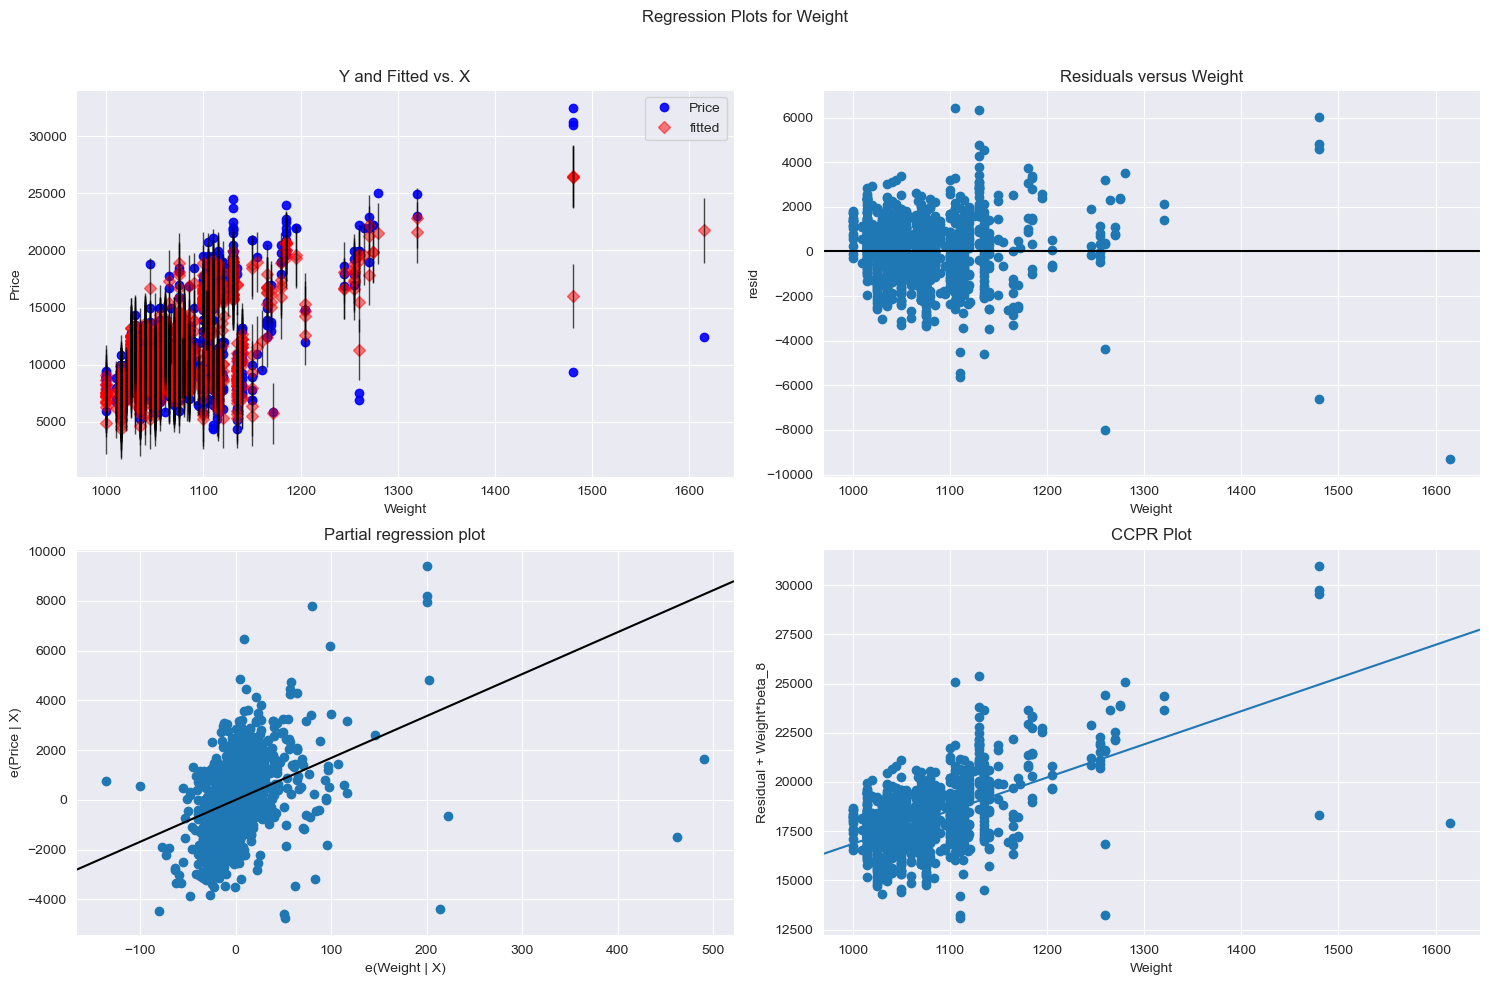

In [122]:
import statsmodels.api as sm
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [123]:
#model deletion ddiagnostics

In [124]:
#cooks distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c  # so the cooks distance is greater than 1 means there is outlier or influencer

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

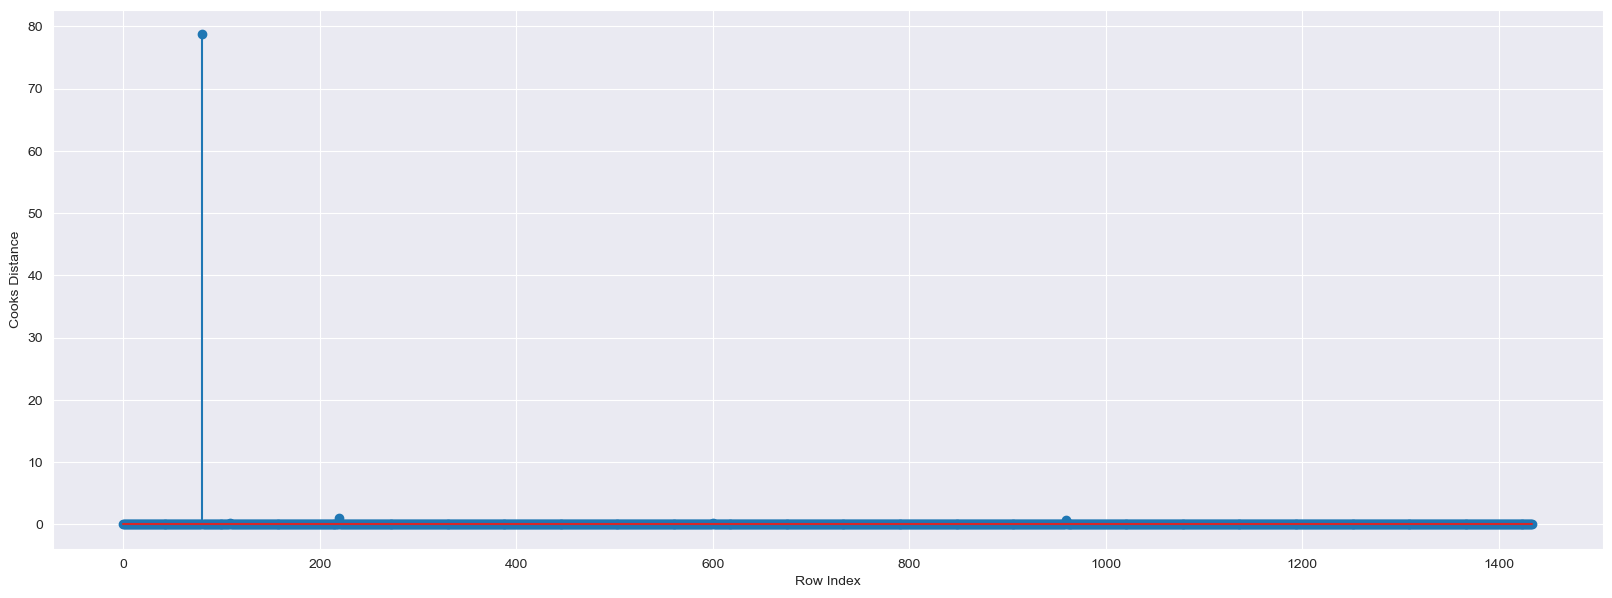

In [125]:
#plotting the influencer values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [126]:
(np.argmax(c),np.max(c))

(80, 78.72950582248232)

In [127]:
#High influence points
data3.shape

(49, 8)

In [128]:
k=data2.shape[1]
n=data2.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020905923344947737

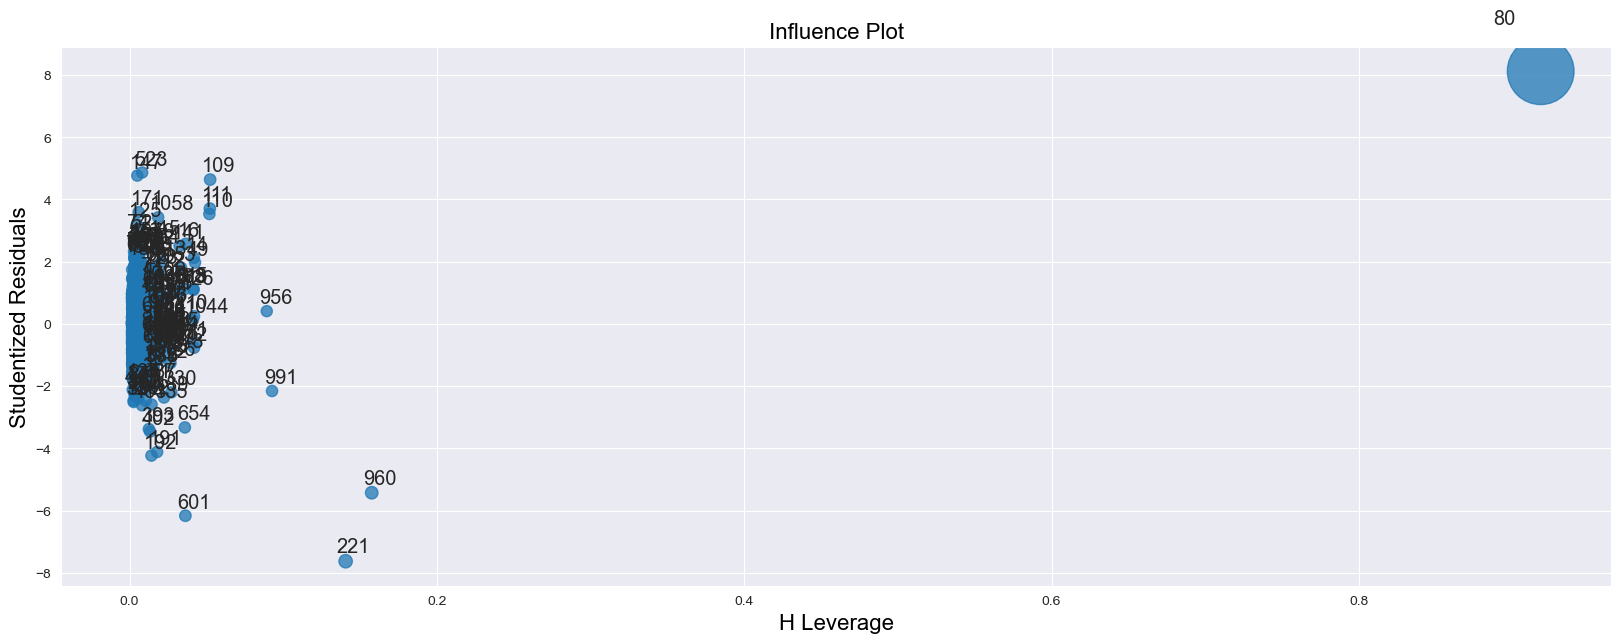

In [129]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(20,7))
fig = sm.graphics.influence_plot(model, ax= ax)

In [130]:
data2[data2.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## IMPROVING THE MODEL

In [131]:
data3=data2.drop(data2.index[80],axis=0).reset_index()

In [132]:
data3

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1431,7500,69,20544,86,1300,3,5,69,1025
1430,1432,10845,72,19000,86,1300,3,5,69,1015
1431,1433,8500,71,17016,86,1300,3,5,69,1015
1432,1434,7250,70,16916,86,1300,3,5,69,1015


In [133]:
data3=data3.drop(['index'],axis=1)

In [134]:
data3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [135]:
final_ml_price=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data3).fit()
final_ml_price

In [136]:
(final_ml_price.rsquared,final_ml_price.aic,final_ml_price.bic)

(0.8681163912634053, 24669.363894157, 24716.777901347436)

In [137]:
#the R-squared value of final_ml_price is greater than the model R-squared value so the multi linear regression problem is sloved